In [5]:
pip install --upgrade imutils

Requirement already up-to-date: imutils in c:\users\vanir\anaconda3\lib\site-packages (0.5.3)
Note: you may need to restart the kernel to use updated packages.


## IMPORTING NECESSARY LIBRARIES

In [2]:
# import the necessary packages
# import the necessary packages
from collections import deque
from imutils.video import VideoStream
import numpy as np
#import argparse
import cv2
import imutils
import time
import os

#construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-v", "--video",
#	help="path to the (optional) video file")
#ap.add_argument("-b", "--buffer", type=int, default=64,
#	help="max buffer size")
#args = vars(ap.parse_args())

# How to:
- Run the below code<br>
- A pop up window with your camera view image on it. Take a light green object and the yellow circle will follow it leaving a red ink trail.<br>
- Press 'q' to quit this window.<br>
- The vide will be saved as 'filename.avi'

# Result
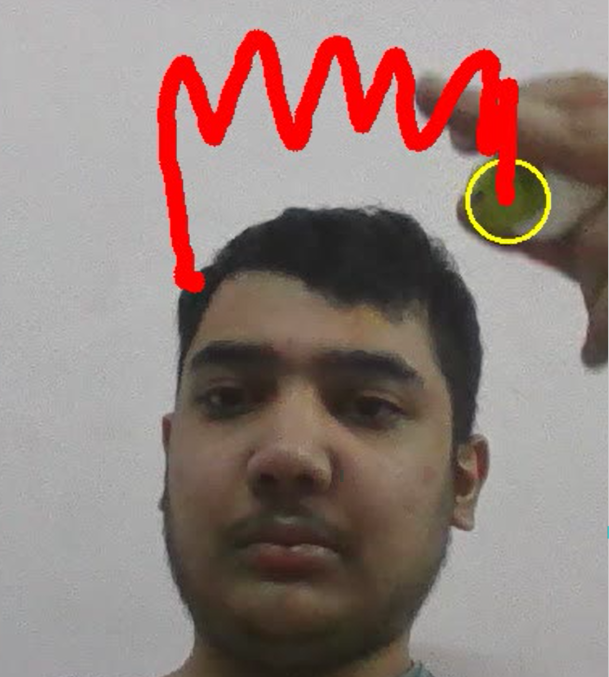

In [18]:
# define the lower and upper boundaries of the "green"
# ball in the HSV color space, then initialize the
# list of tracked points
greenLower = (29, 86, 6)
greenUpper = (64, 255, 255)
#blueLower = (,86,6)
#blueUpper = (30,255,255)
pts = deque()
#eraser = deque()

vs = cv2.VideoCapture(0)
# otherwise, grab a reference to the video file
size = (int(vs.get(3)),int(vs.get(4)))
result = cv2.VideoWriter('filename.avi',  
                         cv2.VideoWriter_fourcc(*'MJPG'), 
                         10, size) 
    
# allow the camera or video file to warm up
time.sleep(2.0)
# keep looping
while True:
	# grab the current frame
	ret, frame = vs.read()
	# handle the frame from VideoCapture or VideoStream
	# if we are viewing a video and we did not grab a frame,
	# then we have reached the end of the video
	if frame is None:
		break
	# resize the frame, blur it, and convert it to the HSV
	# color space
	#frame = imutils.resize(frame, width=600)
	blurred = cv2.GaussianBlur(frame, (11, 11), 0)
	hsv = cv2.cvtColor((blurred), cv2.COLOR_BGR2HSV)
	# construct a mask for the color "green", then perform
	# a series of dilations and erosions to remove any small
	# blobs left in the mask
	mask = cv2.inRange(hsv, greenLower, greenUpper)
	mask = cv2.erode(mask, None, iterations=2)
	mask = cv2.dilate(mask, None, iterations=2)
 # find contours in the mask and initialize the current
	# (x, y) center of the ball
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	center = None
	# only proceed if at least one contour was found
	if len(cnts) > 0:
		# find the largest contour in the mask, then use
		# it to compute the minimum enclosing circle and
		# centroid
		c = max(cnts, key=cv2.contourArea)
		((x, y), radius) = cv2.minEnclosingCircle(c)
		M = cv2.moments(c)
		center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
		# only proceed if the radius meets a minimum size
		if radius > 10:
			# draw the circle and centroid on the frame,
			# then update the list of tracked points
			cv2.circle(frame, (int(x), int(y)), int(radius),
				(0, 255, 255), 2)
			cv2.circle(frame, center, 5, (0, 0, 255), -1)
	# update the points queue
	pts.appendleft(center)
 	# loop over the set of tracked points
	for i in range(1, len(pts)):
		# if either of the tracked points are None, ignore
		# them
		if pts[i - 1] is None or pts[i] is None:
			continue
		# otherwise, compute the thickness of the line and
		# draw the connecting lines
		thickness = 10
		cv2.line(frame, pts[i - 1], pts[i], (0, 0, 255), thickness)
	# show the frame to our screen
	cv2.imshow("Frame", cv2.flip(frame,1))
	result.write(cv2.flip(frame,1)) 
	key = cv2.waitKey(1) & 0xFF
	# if the 'q' key is pressed, stop the loop
	if key == ord("q"):
		break
# if we are not using a video file, stop the camera video stream

vs.release()
result.release() 
# close all windows
cv2.destroyAllWindows()